In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import itertools
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

import imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Using TensorFlow backend.


In [2]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['acc'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

In [3]:
def plot_bin_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['binary_accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [5]:
data = pd.read_csv('C:/Users/ak19919/Downloads/ml_root/analytics vidya/hr_analytics/train.csv')
data.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [6]:
data = data.set_index('employee_id')
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     5
length_of_service       35
kpis_met_>80%            2
awards_won?              2
avg_training_score      61
is_promoted              2
dtype: int64

In [8]:
data.shape

(54808, 13)

In [9]:
data.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
kpis_met_>80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
# Imputing missing values and adding info column

for column in ['education', 'previous_year_rating']:
    data[column].fillna(data[column].mode()[0], inplace = True)
    
data['joining_age'] = data['age'] - data['length_of_service']

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 14 columns):
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null float64
length_of_service       54808 non-null int64
kpis_met_>80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
joining_age             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 6.3+ MB


In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,54808.0,3.304481,1.214770,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
kpis_met_>80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0
joining_age,54808.0,28.938403,5.825101,17.0,25.0,27.0,31.0,58.0


In [13]:
# Keeping only numerical data fields
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met_>80%,awards_won?,avg_training_score,is_promoted,joining_age
employee_id,,,,,,,,,
65438,1,35,5.0,8,1,0,49,0,27
65141,1,30,5.0,4,0,0,60,0,26
7513,1,34,3.0,7,0,0,50,0,27
2542,2,39,1.0,10,0,0,50,0,29
48945,1,45,3.0,2,0,0,73,0,43


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234847881D0>,
      dtype=object)

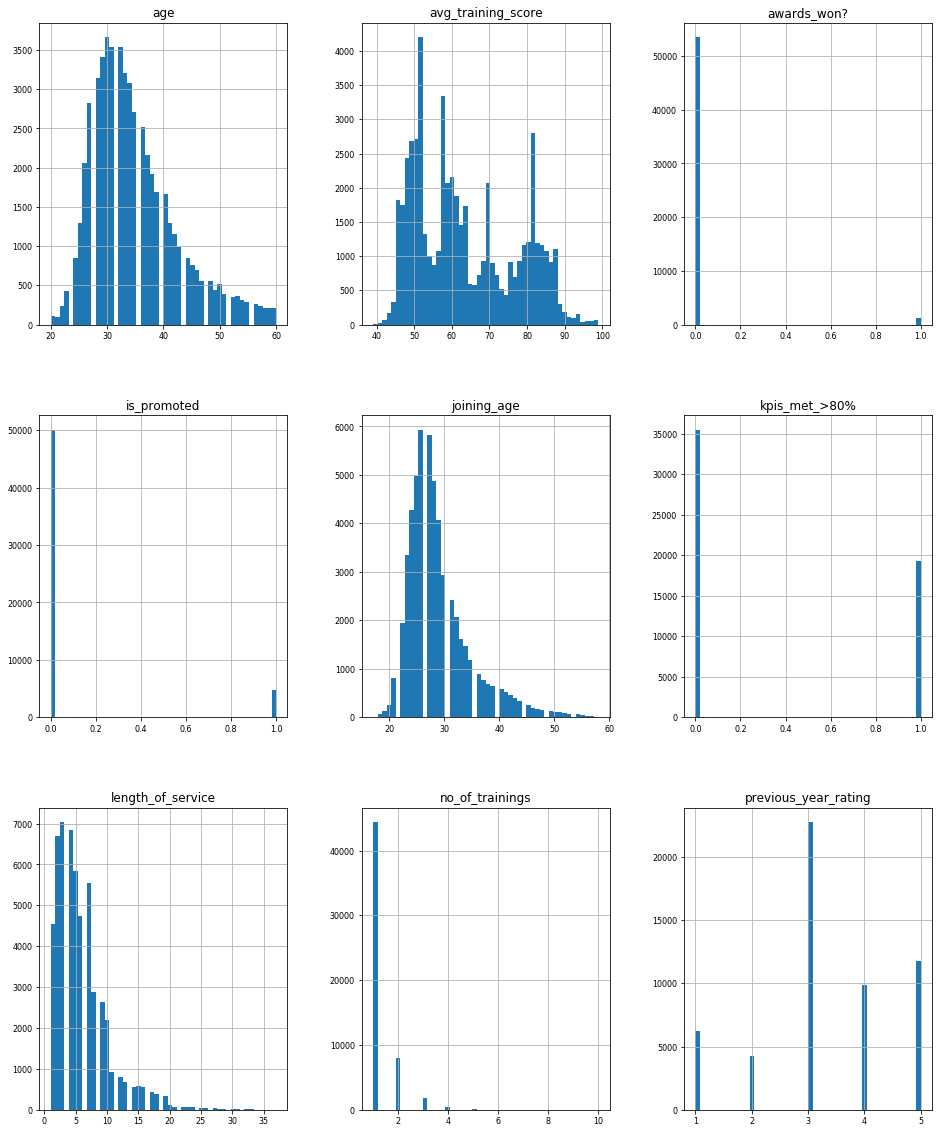

In [14]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

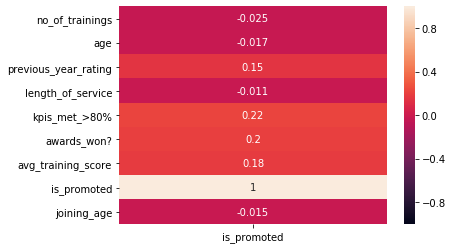

In [15]:
sns.heatmap(df_num.corr()[['is_promoted']], annot=True, vmin=-1, vmax=1)

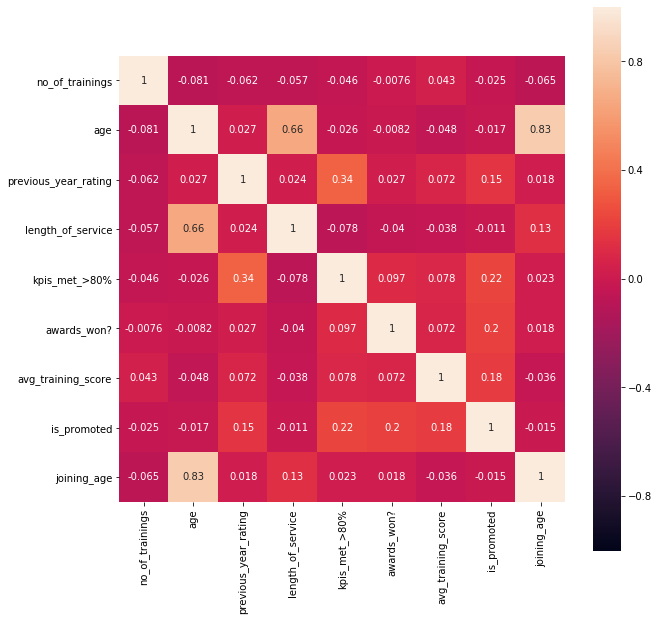

In [16]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df_num.corr(), annot=True, square=True, vmin=-1, vmax=1)

In [17]:
# As age is a categorical variable, instead of scaling this feature like other variables, Quantile based binning 
# is a good strategy to use for adaptive binning. Quantiles are specific values or cut-points which help in 
# partitioning the continuous valued distribution of a specific numeric field into discrete contiguous bins 
# or intervals. Thus, q-Quantiles help in partitioning a numeric attribute into q equal partitions

quantile_list = [0, .25, .5, .75, 1.]
age_quantiles = data['age'].quantile(quantile_list)
age_quantiles

0.00    20.0
0.25    29.0
0.50    33.0
0.75    39.0
1.00    60.0
Name: age, dtype: float64

Text(0, 0.5, 'Frequency')

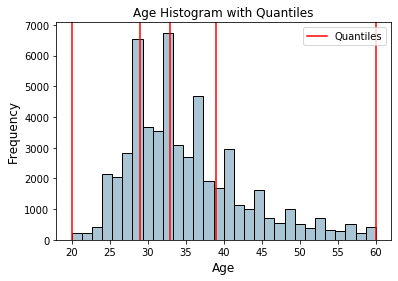

In [18]:
fig, ax = plt.subplots()
data['age'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in age_quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Age Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [19]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
# data['age_quantile_range'] = pd.qcut(data['age'], q=quantile_list)
data['age_range'] = pd.qcut(data['age'], q=quantile_list, labels=quantile_labels)
data = data.drop('age', axis=1)
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,kpis_met_>80%,awards_won?,avg_training_score,is_promoted,joining_age,age_range
employee_id,,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,5.0,8,1,0,49,0,27,50-75Q
65141,Operations,region_22,Bachelor's,m,other,1,5.0,4,0,0,60,0,26,25-50Q
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,3.0,7,0,0,50,0,27,50-75Q
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,1.0,10,0,0,50,0,29,50-75Q
48945,Technology,region_26,Bachelor's,m,other,1,3.0,2,0,0,73,0,43,75-100Q


,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,kpis_met_>80%,awards_won?,avg_training_score,is_promoted,age_range,join_age_range
employee_id,,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,5.0,8,1,0,49,0,50-75Q,25-50Q
65141,Operations,region_22,Bachelor's,m,other,1,5.0,4,0,0,60,0,25-50Q,25-50Q
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,3.0,7,0,0,50,0,50-75Q,25-50Q
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,1.0,10,0,0,50,0,50-75Q,50-75Q
48945,Technology,region_26,Bachelor's,m,other,1,3.0,2,0,0,73,0,75-100Q,75-100Q


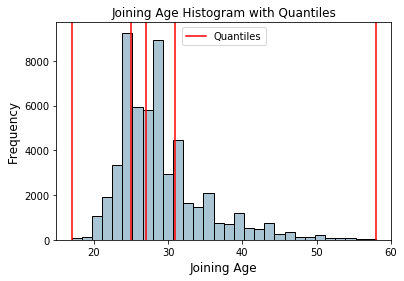

In [20]:
Join_age_quantiles = data['joining_age'].quantile(quantile_list)

fig, ax = plt.subplots()
data['joining_age'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in Join_age_quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Joining Age Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Joining Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

data['join_age_range'] = pd.qcut(data['joining_age'], q=quantile_list, labels=quantile_labels)
data = data.drop('joining_age', axis=1)
data.head()

In [21]:
#LOS = np.array(data['length_of_service'])
## LOS_clean = income[~np.isnan(LOS)]
#l, opt_lambda = stats.boxcox(LOS)
#print('Optimal lambda value for Length of service:', opt_lambda)

## data['rating_BC_0'] = stats.boxcox((1+data['previous_year_rating']), lmbda = 0)
#data['LOS_BC_opt'] = stats.boxcox(data['length_of_service'], lmbda = opt_lambda)
#data = data.drop('length_of_service', axis=1)
#data.head(5)

In [21]:
# One hot encoding categorical features

cat_features = ['gender', 'education', 'recruitment_channel', 'region', 'department', 'age_range', 'join_age_range']
df_cat = pd.get_dummies(data[cat_features])
data = data.drop(cat_features, axis=1)
data = pd.concat([data, df_cat], axis = 1)

In [22]:
# Scaling the features within range (0, 1)

ss = StandardScaler()
scale_features = ['no_of_trainings', 'previous_year_rating', 'length_of_service', 'avg_training_score']
data[scale_features] = ss.fit_transform(data[scale_features])
#data.head()

In [23]:
# Performing Train Test Split (70-30 split)

#data = data.drop('recruitment_channel', axis=1)
X = data.drop('is_promoted', axis=1).values
y = data['is_promoted'].values

# Oversampling the data, define oversampling strategy
#oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
#X_over, y_over = oversample.fit_resample(X, y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

W0402 00:23:53.650884 12120 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0402 00:23:53.655176 12120 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0402 00:23:53.666955 12120 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0402 00:23:53.878491 12120 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\deepai\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0402 00:23:53.892527 12120 depr

<Figure size 576x432 with 0 Axes>

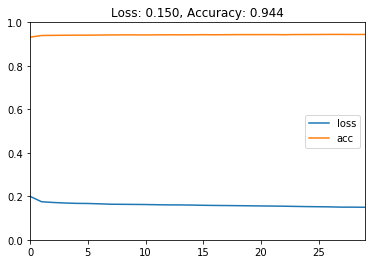

In [25]:
ADAMAX = optimizers.Adamax(lr = 0.002, beta_1 = 0.9, beta_2 = 0.999)
# Accuracy with ADAMAX at 0.944, loss at 0.153, F1 Score at 0.5222337125129266

ADAM = optimizers.Adam(lr = 0.01)
# Accuracy with ADAM at 0.945, loss at 0.146, F1 Score at 0.517427589592538

ADADELTA = optimizers.Adadelta(lr = 1.0, rho = 0.95)
# Accuracy with ADADELTA at , loss at 0.155, F1 Score at 0.506652474720596

ANN_model = Sequential()
ANN_model.add(Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'))
ANN_model.add(Dense(64, activation = 'tanh'))
ANN_model.add(Dense(64, activation = 'tanh'))
ANN_model.add(Dense(64, activation = 'tanh'))
ANN_model.add(Dense(16, activation = 'tanh'))
# Last layer to use sigmoid activation function (coz binary classification)
ANN_model.add(Dense(1, activation = 'sigmoid'))

ANN_model.compile(optimizer = ADAMAX, loss = 'binary_crossentropy', metrics = ['accuracy'])

ANN_history = ANN_model.fit(X_train, y_train, verbose = 0, epochs = 30)
plot_loss_accuracy(ANN_history)

Confusion matrix, without normalization
[[10009    32]
 [  591   330]]


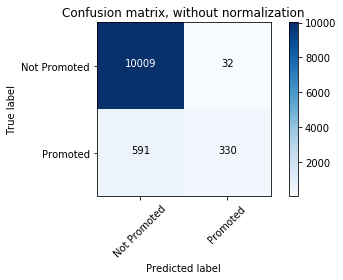

In [26]:
# Plot Confusion matrix

Y_Pred = ANN_model.predict(X_test)
Cnf_matrix = confusion_matrix(y_test, Y_Pred.round())
np.set_printoptions(precision = 2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(Cnf_matrix, classes=['Not Promoted','Promoted'],
                      title='Confusion matrix, without normalization')

In [27]:
#extracting true_positives, false_positives, true_negatives, false_negatives

tn, fp, fn, tp = confusion_matrix(y_test, Y_Pred.round()).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  10009
False Positives:  32
False Negatives:  591
True Positives:  330


In [28]:
#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy: {:0.2f}%".format(Accuracy))
print("Accuracy Score: {}".format(accuracy_score(y_test, Y_Pred.round(), normalize = False)))

#Precision 
Precision = tp/(tp+fp) 
print("Precision: {:0.2f}".format(Precision))
print("Precision Score: {}".format(precision_score(y_test, Y_Pred.round(), pos_label = 1, average = 'binary')))

#Recall 
Recall = tp/(tp+fn) 
print("Recall: {:0.2f}".format(Recall))
print("Recall Score: {}".format(recall_score(y_test, Y_Pred.round(), pos_label = 1, average = 'binary')))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))
print("F1 Score: {}".format(f1_score(y_test, Y_Pred.round(), pos_label = 1, average = 'binary')))

#Specificity 
Specificity = tn/(tn+fp)
print("Specificity: {:0.2f}".format(Specificity))

Accuracy: 94.32%
Accuracy Score: 10339
Precision: 0.91
Precision Score: 0.9116022099447514
Recall: 0.36
Recall Score: 0.3583061889250814
F1 Score 0.51
F1 Score: 0.514419329696025
Specificity: 1.00


In [29]:
test_data = pd.read_csv('C:/Users/ak19919/Downloads/ml_root/analytics vidya/hr_analytics/test.csv')

In [30]:
# Imputing missing values

for column in ['education', 'previous_year_rating']:
    test_data[column].fillna(test_data[column].mode()[0], inplace = True)

In [31]:
## data['LOS_BC_0'] = stats.boxcox((1+data['length_of_service']), lmbda = 0)
#test_data['LOS_BC_opt'] = stats.boxcox(test_data['length_of_service'], lmbda = opt_lambda)
#test_data = test_data.drop('length_of_service', axis=1)
#test_data.head(5)

In [33]:
test_data['joining_age'] = test_data['age'] - test_data['length_of_service']
test_data['join_age_range'] = pd.qcut(test_data['joining_age'], q=quantile_list, labels=quantile_labels)
test_data = test_data.drop('joining_age', axis=1)

test_data['age_range'] = pd.qcut(test_data['age'], q = quantile_list, labels = quantile_labels)
test_data = test_data.drop('age', axis = 1)
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,join_age_range,age_range
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,3.0,1,1,0,77,0-25Q,0-25Q
1,74430,HR,region_4,Bachelor's,f,other,1,3.0,5,0,0,51,25-50Q,25-50Q
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,1.0,4,0,0,47,25-50Q,25-50Q
3,38562,Procurement,region_2,Bachelor's,f,other,3,2.0,9,0,0,65,0-25Q,25-50Q
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,4.0,7,0,0,61,0-25Q,25-50Q


In [34]:
df_cat_T = pd.get_dummies(test_data[cat_features])
test_data = test_data.drop(cat_features, axis = 1)
test_data = pd.concat([test_data, df_cat_T], axis = 1)

In [35]:
# Scaling the features within range (0, 1)
test_data[scale_features] = ss.fit_transform(test_data[scale_features])
test_data.head()

,employee_id,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_f,gender_m,education_Bachelor's,...,department_Sales & Marketing,department_Technology,age_range_0-25Q,age_range_25-50Q,age_range_50-75Q,age_range_75-100Q,join_age_range_0-25Q,join_age_range_25-50Q,join_age_range_50-75Q,join_age_range_75-100Q
0,8724,-0.423094,-0.257191,-1.143200,1,0,1.024263,0,1,1,...,0,1,1,0,0,0,1,0,0,0
1,74430,-0.423094,-0.257191,-0.192590,0,0,-0.914377,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,72255,-0.423094,-1.900667,-0.430243,0,0,-1.212629,0,1,1,...,1,0,0,1,0,0,0,1,0,0
3,38562,2.905264,-1.078929,0.758019,0,0,0.129506,1,0,1,...,0,0,0,1,0,0,1,0,0,0
4,64486,-0.423094,0.564547,0.282714,0,0,-0.168746,0,1,1,...,0,0,0,1,0,0,1,0,0,0


In [36]:
test_no_id = test_data.drop('employee_id', axis = 1)
test_predictions = ANN_model.predict(test_no_id)
employee_ID = test_data['employee_id']
submission_df_1 = pd.DataFrame({
                  "employee_id": employee_ID, 
                  "is_promoted": test_predictions.ravel()})

In [37]:
submission_df_1.is_promoted = submission_df_1.is_promoted.round()
submission_df_1.to_csv('submission.csv',index = False)

In [38]:
print(ANN_history.history.keys())

dict_keys(['loss', 'acc'])
